In [254]:
%matplotlib inline
import pandas as pd
import pylab as plt
import numpy as np

In [255]:
ip_data = pd.read_csv('Breast-Cancer-Wisconsin.csv')

In [256]:
ip_data.head()

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


1. Check for missing values

In [257]:
ip_data['A7'].replace('?', np.NaN)

0        1
1       10
2        2
3        4
4        1
5       10
6       10
7        1
8        1
9        1
10       1
11       1
12       3
13       3
14       9
15       1
16       1
17       1
18      10
19       1
20      10
21       7
22       1
23     NaN
24       1
25       7
26       1
27       1
28       1
29       1
      ... 
669      5
670      8
671      1
672      1
673      1
674      1
675      1
676      1
677      1
678      1
679      1
680     10
681     10
682      1
683      1
684      1
685      1
686      1
687      1
688      1
689      1
690      1
691      5
692      1
693      1
694      2
695      1
696      3
697      4
698      5
Name: A7, dtype: object

In [258]:
ip_data['A7'] = pd.to_numeric(ip_data['A7'], errors='coerce')

In [259]:
print(pd.isnull(ip_data).sum())

Scn       0
A2        0
A3        0
A4        0
A5        0
A6        0
A7       16
A8        0
A9        0
A10       0
CLASS     0
dtype: int64


There are 16 NaN types in column A7

Replacing all Nan type with column mean

In [260]:
ip_data = ip_data.apply(lambda x: x.fillna(x.mean(skipna=True)))

Summary statistics of the input data

In [261]:
ip_data.describe()

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.601852,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


Number of data observations in the input data

In [262]:
print('There are rows:%d and cols:%d in input data' %(ip_data.shape[0], ip_data.shape[1]))

There are rows:699 and cols:11 in input data


unique id values (column Scn)

In [263]:
print('Number of unique ids in input data: ',len(ip_data.Scn.unique()))

Number of unique ids in input data:  645


Histogram of columns A2-A10

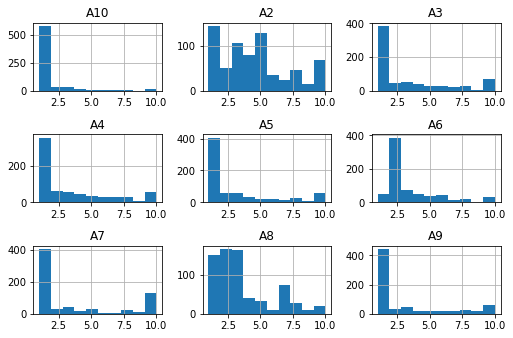

In [264]:
exc = ['Scn', 'CLASS']
ip_data.ix[:, ip_data.columns.difference(exc)].hist()
plt.tight_layout(rect=(0, 0, 1.2, 1.2))
plt.show()

Bar plot of column CLASS grouped by value_count

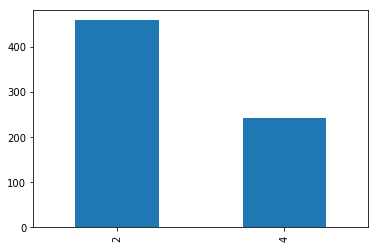

In [265]:
pd.value_counts(ip_data['CLASS']).plot.bar()
plt.show()

In [266]:
#Check for correlation
ip_data.corr(method='pearson')

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
Scn,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.098668,-0.060051,-0.052072,-0.034901,-0.080226
A2,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.587300,0.558428,0.535835,0.350034,0.716001
A3,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.686801,0.755721,0.722865,0.458693,0.817904
A4,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.709606,0.735948,0.719446,0.438911,0.818934
A5,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.665049,0.666715,0.603352,0.417633,0.696800
A6,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.581261,0.616102,0.628881,0.479101,0.682785
A7,-0.098668,0.587300,0.686801,0.709606,0.665049,0.581261,1.000000,0.675896,0.577362,0.338740,0.816050
A8,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.675896,1.000000,0.665878,0.344169,0.756616
A9,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.577362,0.665878,1.000000,0.428336,0.712244
A10,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.338740,0.344169,0.428336,1.000000,0.423170


Scatter plot for columns A3 and A4

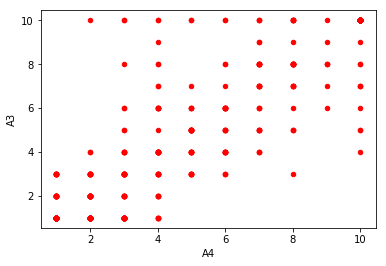

In [267]:
ip_data.plot(kind='scatter',x='A4',y='A3',color='red')
plt.show()

Inferences from initial analysis:

1. As we can see from the basic stats columns - A3, A7, A9 has higher standard deviation and thus we can normalize these columns for better results.

2. Also we can see from the correlation matrix that there are columns with very high correlation value e.g., columns A3 and A4. Hence one from each pair can be ommited from the inclusion into the final model which will yeild models of lower complexity. Thus improving their performance. 

## Phase 2

In [268]:
from sklearn.cluster import KMeans

In [269]:
ip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
Scn      699 non-null int64
A2       699 non-null int64
A3       699 non-null int64
A4       699 non-null int64
A5       699 non-null int64
A6       699 non-null int64
A7       699 non-null float64
A8       699 non-null int64
A9       699 non-null int64
A10      699 non-null int64
CLASS    699 non-null int64
dtypes: float64(1), int64(10)
memory usage: 60.1 KB


Selecting cols A2-A10. Dropping col CLASS for KMeans

In [270]:
model_ip_data = ip_data.loc[:, 'A2':'A10']

In [271]:
model_ip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 9 columns):
A2     699 non-null int64
A3     699 non-null int64
A4     699 non-null int64
A5     699 non-null int64
A6     699 non-null int64
A7     699 non-null float64
A8     699 non-null int64
A9     699 non-null int64
A10    699 non-null int64
dtypes: float64(1), int64(8)
memory usage: 49.2 KB


Creating base model with cluster size = 4

In [272]:
model = KMeans(n_clusters = 4)
model.fit(model_ip_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Calculating centriods

In [273]:
centroids = model.cluster_centers_

print("Centroids has: %d clusters with %d columns" %(centroids.shape[0],centroids.shape[1]))
print(centroids)

Centroids has: 4 clusters with 9 columns
[[ 6.72151899  8.36708861  8.40506329  7.72151899  6.73417722  9.3164557
   7.36708861  7.73417722  3.73417722]
 [ 2.93171806  1.24669604  1.37004405  1.3061674   2.05066079  1.3359821
   2.07048458  1.2092511   1.06828194]
 [ 7.3047619   4.75238095  4.93333333  4.6         3.98095238  8.77661577
   5.12380952  3.76190476  1.8       ]
 [ 7.52459016  7.62295082  7.18032787  4.52459016  6.01639344  3.50219619
   5.62295082  7.36065574  2.32786885]]


### Finding optimal number of clusters

In [274]:
k_value = range(1, 15)
inertias = []

for k in k_value:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(model_ip_data)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

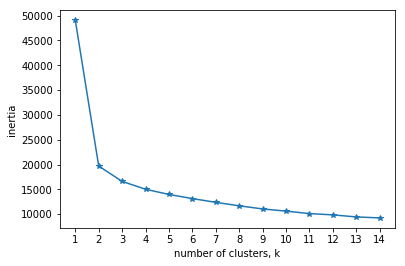

In [275]:
# Plot k_value vs inertias
plt.plot(k_value, inertias, '-*')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(k_value)
plt.show()

A good clustering model has optimal number of tightly grouped clusters(low inertia). We can see from the plot above, that the inertia keeps decreasing all the way till the here chosen max k value of 10. But after k value = 2, the decrease is very slow and gradual. So we can use k=2 to be the optimum number of clusters here. 

### Data Variation

In [276]:
std_dev_cols = list(model_ip_data.std())

In [277]:
col_names = list(model_ip_data)

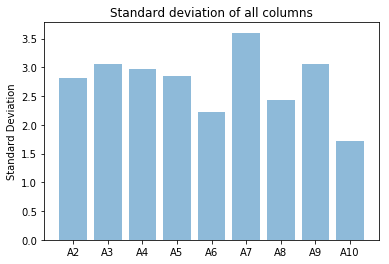

In [278]:
x_pos = [i for i, _ in enumerate(col_names)]
plt.bar(x_pos, std_dev_cols, align='center', alpha=0.5)
plt.xticks(x_pos, col_names)
plt.ylabel('Column Name')
plt.ylabel('Standard Deviation')
plt.title('Standard deviation of all columns')
plt.show()

From the chart we can see that column A7 has the highest variance followed by columns A2, A3, A4, A5 and A9 which have fairly similar variance.  

### Normalization

In [340]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [356]:
scaler = StandardScaler()
kmeans_model = KMeans(n_clusters=2) #Creating KMeans with optimal number of clusters

In [357]:
# Create pipeline
pipeline = make_pipeline(scaler, kmeans_model)

In [358]:
pipeline.fit(model_ip_data)

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

Calculating centroids

In [396]:
centroids = kmeans_model.cluster_centers_

print("Centroids has: %d clusters with %d columns" %(centroids.shape[0],centroids.shape[1]))
print(centroids)

Centroids has: 2 clusters with 10 columns
[[-0.497738   -0.60811342 -0.60323903 -0.51617307 -0.51352357 -0.58571702
  -0.54849564 -0.53060302 -0.30367169 -0.71166391]
 [ 0.98276779  1.20070054  1.19107621  1.01916726  1.01393589  1.15647956
   1.08298713  1.04765873  0.59959005  1.40515767]]


## Phase 3

### Cluster

In [442]:
#Creating KMeans with params -> n_clusters=2, n_init=20, max_iter=500
scaler = StandardScaler()
kmeans_model_p3 = KMeans(n_clusters=2, n_init=20, max_iter=500)

In [443]:
pipeline_p3 = make_pipeline(scaler, kmeans_model_p3)
pipeline_p3.fit(model_ip_data)

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=2, n_init=20, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [444]:
labels = pipeline_p3.predict(model_ip_data)

### Dataframe

In [445]:
model_ip_data['labels'] = labels

In [446]:
model_ip_data.columns

Index(['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'labels'], dtype='object')

In [447]:
model_ip_data['labels'].unique()

array([0, 1], dtype=int64)

In [448]:
#Changing values of the column labels 0->2, 1->4
model_ip_data['labels'] = model_ip_data['labels'].map(lambda x: 2 if x==0 else 4)

In [449]:
model_ip_data['labels'].unique()

array([2, 4], dtype=int64)

### Error Rate Function

In [450]:
def Err_Rate_Fn(predict_val, actual_val): 
    #b ->  total number of points with predicted labels = 4 that correspond to CLASS = 2 
    #m -> total number of points with predicted labels = 2 that correspond to CLASS = 4 
    #t -> total number of datapoints with predicted labels (labels column) Not equal to actual class (CLASS column) 
    b, m, t = 0, 0, 0
    for i,j in zip(predict_val, actual_val):
        if i != j:
            t += 1
        if i == 4 and j == 2:
            b += 1
        elif i == 2 and j == 4:
            m += 1

    B_cell_err = b/len(pred_val[pred_val == 2])
    M_cell_err = m/len(pred_val[pred_val == 4])
    tot_err_rate = t/len(pred_val)
    
    return B_cell_err, M_cell_err, tot_err_rate

In [451]:
Benign_cell_err, Malign_cell_err, total_err_rate = Err_Rate_Fn(model_ip_data['labels'], ip_data['CLASS'])

In [452]:
print('Benign cell error rate: ' ,(Benign_cell_err*100), '%')
print('Malign cell error rate: ' ,(Malign_cell_err*100), '%')
print('Total error rate ' , (total_err_rate*100), '%')

Benign cell error rate:  5.106382978723404 %
Malign cell error rate:  4.094827586206897 %
Total error rate  4.434907010014307 %


### Report

So the final KMeans model did a great job in predicting the final class of whether the cells were benign or malign for the supplied breast cancer dataset. The final calculated error rates of the model are as follows -
1.  predicted benign cell error rate ~ 5%
2. predicted malign cell error rate ~ 4% and 
3. the overall error rate being ~4.5%. 

We achieved the above results by employing the following steps -> starting with loading the data into a dataframe, then cleaning the data (which also consisted of filling in missing values), finding the optimal number of cluster using inertia plot, employing StandardScaler normalization on the dataset and lastly fitting the data to our KMeans model with the params(n_clusters=2, n_init=20, max_iter=500). We used all 9 data columns present in the dataset. The results can be further improved by using dimensionality reduction algorithms like PCA or by simply eliminating redundant columns using the correlation matrix.
